In [2]:
%load_ext autoreload
%autoreload 2
%qtconsole

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [5]:
%matplotlib inline

In [6]:
X = pd.read_pickle("./X-2s.pkl")
y = pd.read_pickle("./y-2s.pkl")

In [7]:
# Variabili numeriche, senza l'utilizzatore
Xnum = X.drop("user", axis=1)

### Variabili di riassunto
Sono state calcolate le seguenti variabili di riassunto del segnale, nell'intervallo ampio 2000 ms di osservazione:
1. Integrale del segnale nell'intervallo, calcolato con l'approssimazione per trapezi.
2. Massimo dell'accelerazione nell'intervallo.
3. Variazione media assoluta della derivata nell'intervallo.

In [12]:
# Funzioni per calcolare variazione media della derivata e sbiancare i dati
from funzioni import AbsMeanVarDeriv, Whiten

In [13]:
intTrapz = pd.DataFrame(np.trapz(Xnum, dx=10)) # integrale con approssimazione per trapezi
maxA = Xnum.max(1) # massimo accelerazione
MVDeriv = AbsMeanVarDeriv(Xnum, 10) # variazione media della derivata

In [16]:
# Costruzione del dataframe delle esplicative
espl = pd.concat([intTrapz, maxA, MVDeriv], axis=1)
espl.columns=["intTrapz", "maxA", "MVDeriv"]

Analisi esplorativa con `PCA`, `ICA`, `t-SNE`.

In [21]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

In [18]:
# Sbiancamento dei dati
esplWh = Whiten().fit_transform(espl)

In [22]:
pca = PCA(n_components=2, random_state=42)
esplPCA = pca.fit_transform(esplWh)

In [23]:
ica = FastICA(n_components=2, random_state=42)
esplICA = ica.fit_transform(esplWh)

In [29]:
tsne = TSNE(n_components=2, random_state=42)
esplTSNE = tsne.fit_transform(esplWh)

In [25]:
# Funzione che produce lo scatterplot con i colori per i gruppi dati da y
from funzioni import ScatterGroup

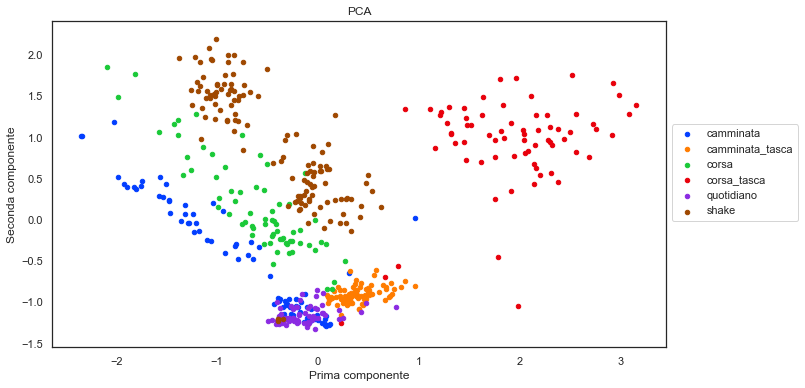

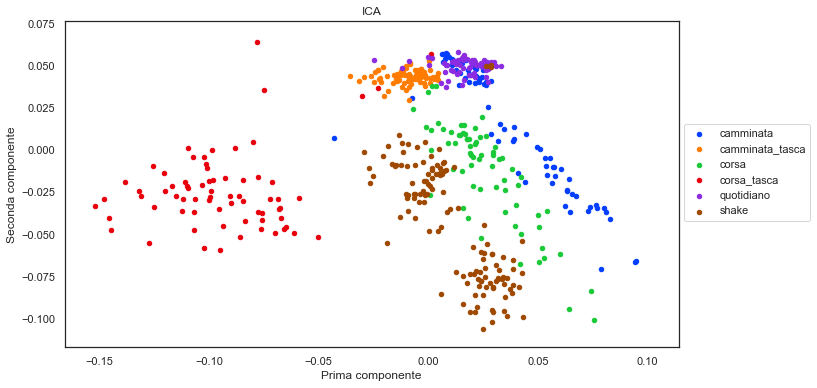

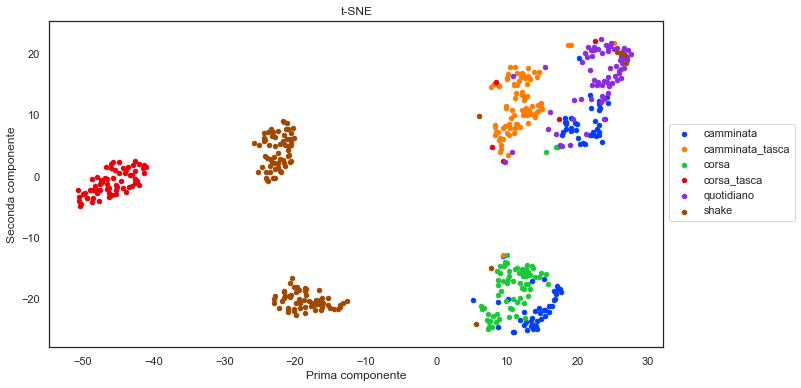

In [30]:
for title,dat in zip(["PCA","ICA","t-SNE"], [esplPCA, esplICA, esplTSNE]):
    fig, ax = ScatterGroup(pd.DataFrame(dat, columns=["Prima componente", "Seconda componente"]),
                       grp=y, palette="bright")
    fig.set_figwidth(11)
    fig.set_figheight(6)
    ax.set_title(title)
    plt.legend(bbox_to_anchor=(1,0.7))